In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, f1_score, recall_score

First I started by importing the necessary libraries and frameworks

To imported the file given in .xlsx form it has to be changed to .csv file "bankdataset.csv"

We have different options to import the file, first by uploading to the Google drive "/bankdataset.csv" and the second from github "https://github.com/Ataklti-tech/myCat2File/blob/main/bankdataset.csv"

In [ ]:
df = pd.read_csv("/bankdataset.csv")

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
# Finding the missing
df.isnull()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11158,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11159,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11160,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


It shows that we don't have any null values in the given csv file dataset

In [ ]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
df.shape

(11162, 17)

In [ ]:
df.deposit.value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [ ]:
pd.get_dummies(df.deposit)

,no,yes
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
11157,1,0
11158,1,0
11159,1,0
11160,1,0


In [ ]:
df.isnull().sum() / df.shape[0]

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
deposit      0.0
dtype: float64

In [ ]:
df.age.value_counts()

31    496
32    477
34    466
33    464
35    461
     ... 
92      2
93      2
88      2
95      1
89      1
Name: age, Length: 76, dtype: int64

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.marital.value_counts()

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

In [ ]:
df.education.value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

In [ ]:
df.job.value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [ ]:
df.deposit.value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [ ]:
 deposit_status = pd.get_dummies(df.deposit, prefix="deposit")
 print(deposit_status)

       deposit_no  deposit_yes
0               0            1
1               0            1
2               0            1
3               0            1
4               0            1
...           ...          ...
11157           1            0
11158           1            0
11159           1            0
11160           1            0
11161           1            0

[11162 rows x 2 columns]


In [ ]:
df = df.join(deposit_status)

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,pdays,previous,poutcome,deposit,no,yes,housing_no,housing_yes,deposit_no,deposit_yes
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,...,-1,0,unknown,yes,0,1,0,1,0,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,...,-1,0,unknown,yes,0,1,1,0,0,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,...,-1,0,unknown,yes,0,1,0,1,0,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,...,-1,0,unknown,yes,0,1,0,1,0,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,...,-1,0,unknown,yes,0,1,1,0,0,1


In [ ]:
df.duration.value_counts()

97      39
161     38
158     37
119     37
150     37
        ..
915      1
2029     1
1499     1
1399     1
1812     1
Name: duration, Length: 1428, dtype: int64

To make our data usable we need to scale the non-categorical values such as age, duration, and balance but before that let us categorize Housing and Campaign

In [ ]:
housing_cat = pd.get_dummies(df.housing, prefix="housing")
print(housing_cat)

       housing_no  housing_yes
0               0            1
1               1            0
2               0            1
3               0            1
4               1            0
...           ...          ...
11157           0            1
11158           1            0
11159           1            0
11160           1            0
11161           1            0

[11162 rows x 2 columns]


In [ ]:
df = df.join(housing_cat)

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,pdays,previous,poutcome,deposit,no,yes,housing_no,housing_yes,deposit_no,deposit_yes
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,...,-1,0,unknown,yes,0,1,0,1,0,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,...,-1,0,unknown,yes,0,1,1,0,0,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,...,-1,0,unknown,yes,0,1,0,1,0,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,...,-1,0,unknown,yes,0,1,0,1,0,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,...,-1,0,unknown,yes,0,1,1,0,0,1


In [ ]:
campaign_cat = pd.get_dummies(df.campaign, prefix="campaign")
print(campaign_cat)

       campaign_1  campaign_2  campaign_3  campaign_4  campaign_5  campaign_6  \
0               1           0           0           0           0           0   
1               1           0           0           0           0           0   
2               1           0           0           0           0           0   
3               1           0           0           0           0           0   
4               0           1           0           0           0           0   
...           ...         ...         ...         ...         ...         ...   
11157           1           0           0           0           0           0   
11158           0           0           0           1           0           0   
11159           0           1           0           0           0           0   
11160           0           1           0           0           0           0   
11161           1           0           0           0           0           0   

       campaign_7  campaign

In [ ]:
df = df.join(campaign_cat)

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign_27,campaign_28,campaign_29,campaign_30,campaign_31,campaign_32,campaign_33,campaign_41,campaign_43,campaign_63
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,0,0
1,56,admin.,married,secondary,no,45,no,no,unknown,5,...,0,0,0,0,0,0,0,0,0,0
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,0,0
3,55,services,married,secondary,no,2476,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,0,0
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,...,0,0,0,0,0,0,0,0,0,0


Before I proceed to the scaling, let me first delete unnecessary data from my table

In [ ]:
df.drop(["no", "yes", "deposit", "campaign", "housing"], axis = 1, inplace  = True)

In [ ]:
df.head()

,age,job,marital,education,default,balance,loan,contact,day,month,...,campaign_27,campaign_28,campaign_29,campaign_30,campaign_31,campaign_32,campaign_33,campaign_41,campaign_43,campaign_63
0,59,admin.,married,secondary,no,2343,no,unknown,5,may,...,0,0,0,0,0,0,0,0,0,0
1,56,admin.,married,secondary,no,45,no,unknown,5,may,...,0,0,0,0,0,0,0,0,0,0
2,41,technician,married,secondary,no,1270,no,unknown,5,may,...,0,0,0,0,0,0,0,0,0,0
3,55,services,married,secondary,no,2476,no,unknown,5,may,...,0,0,0,0,0,0,0,0,0,0
4,54,admin.,married,tertiary,no,184,no,unknown,5,may,...,0,0,0,0,0,0,0,0,0,0


Let me start scaling using the scaler

In [ ]:
sc_age = MinMaxScaler()

In [ ]:
df["new_age"] = sc_age.fit_transform(df.age.values.reshape(-1, 1))

In [ ]:
df.head()

,age,job,marital,education,default,balance,loan,contact,day,month,...,campaign_28,campaign_29,campaign_30,campaign_31,campaign_32,campaign_33,campaign_41,campaign_43,campaign_63,new_age
0,59,admin.,married,secondary,no,2343,no,unknown,5,may,...,0,0,0,0,0,0,0,0,0,0.532468
1,56,admin.,married,secondary,no,45,no,unknown,5,may,...,0,0,0,0,0,0,0,0,0,0.493506
2,41,technician,married,secondary,no,1270,no,unknown,5,may,...,0,0,0,0,0,0,0,0,0,0.298701
3,55,services,married,secondary,no,2476,no,unknown,5,may,...,0,0,0,0,0,0,0,0,0,0.480519
4,54,admin.,married,tertiary,no,184,no,unknown,5,may,...,0,0,0,0,0,0,0,0,0,0.467532


In [ ]:
sc_duration = MinMaxScaler()

In [ ]:
df["new_duration"] = sc_duration.fit_transform(df.duration.values.reshape(-1, 1))

In [ ]:
df.head()

,age,job,marital,education,default,balance,loan,contact,day,month,...,campaign_29,campaign_30,campaign_31,campaign_32,campaign_33,campaign_41,campaign_43,campaign_63,new_age,new_duration
0,59,admin.,married,secondary,no,2343,no,unknown,5,may,...,0,0,0,0,0,0,0,0,0.532468,0.268110
1,56,admin.,married,secondary,no,45,no,unknown,5,may,...,0,0,0,0,0,0,0,0,0.493506,0.377675
2,41,technician,married,secondary,no,1270,no,unknown,5,may,...,0,0,0,0,0,0,0,0,0.298701,0.357566
3,55,services,married,secondary,no,2476,no,unknown,5,may,...,0,0,0,0,0,0,0,0,0.480519,0.148750
4,54,admin.,married,tertiary,no,184,no,unknown,5,may,...,0,0,0,0,0,0,0,0,0.467532,0.172983


In [ ]:
sc_balance = MinMaxScaler()

In [ ]:
df["new_balance"] = sc_balance.fit_transform(df.balance.values.reshape(-1, 1))

In [ ]:
df.head()

,age,job,marital,education,default,balance,loan,contact,day,month,...,campaign_30,campaign_31,campaign_32,campaign_33,campaign_41,campaign_43,campaign_63,new_age,new_duration,new_balance
0,59,admin.,married,secondary,no,2343,no,unknown,5,may,...,0,0,0,0,0,0,0,0.532468,0.268110,0.104371
1,56,admin.,married,secondary,no,45,no,unknown,5,may,...,0,0,0,0,0,0,0,0.493506,0.377675,0.078273
2,41,technician,married,secondary,no,1270,no,unknown,5,may,...,0,0,0,0,0,0,0,0.298701,0.357566,0.092185
3,55,services,married,secondary,no,2476,no,unknown,5,may,...,0,0,0,0,0,0,0,0.480519,0.148750,0.105882
4,54,admin.,married,tertiary,no,184,no,unknown,5,may,...,0,0,0,0,0,0,0,0.467532,0.172983,0.079851


In [ ]:
df.drop(["age", "duration", "balance"], axis= 1, inplace = True)

In [ ]:
df.head()

,job,marital,education,default,loan,contact,day,month,pdays,previous,...,campaign_30,campaign_31,campaign_32,campaign_33,campaign_41,campaign_43,campaign_63,new_age,new_duration,new_balance
0,admin.,married,secondary,no,no,unknown,5,may,-1,0,...,0,0,0,0,0,0,0,0.532468,0.268110,0.104371
1,admin.,married,secondary,no,no,unknown,5,may,-1,0,...,0,0,0,0,0,0,0,0.493506,0.377675,0.078273
2,technician,married,secondary,no,no,unknown,5,may,-1,0,...,0,0,0,0,0,0,0,0.298701,0.357566,0.092185
3,services,married,secondary,no,no,unknown,5,may,-1,0,...,0,0,0,0,0,0,0,0.480519,0.148750,0.105882
4,admin.,married,tertiary,no,no,unknown,5,may,-1,0,...,0,0,0,0,0,0,0,0.467532,0.172983,0.079851


In [ ]:
job_cat = pd.get_dummies(df.job, prefix="job")
print(job_cat)

       job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0               1                0                 0              0   
1               1                0                 0              0   
2               0                0                 0              0   
3               0                0                 0              0   
4               1                0                 0              0   
...           ...              ...               ...            ...   
11157           0                1                 0              0   
11158           0                0                 0              0   
11159           0                0                 0              0   
11160           0                0                 0              0   
11161           0                0                 0              0   

       job_management  job_retired  job_self-employed  job_services  \
0                   0            0                  0             0   
1    

In [ ]:
df = df.join(job_cat)

In [ ]:
df.head()

,job,marital,education,default,loan,contact,day,month,pdays,previous,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,admin.,married,secondary,no,no,unknown,5,may,-1,0,...,0,0,0,0,0,0,0,0,0,0
1,admin.,married,secondary,no,no,unknown,5,may,-1,0,...,0,0,0,0,0,0,0,0,0,0
2,technician,married,secondary,no,no,unknown,5,may,-1,0,...,0,0,0,0,0,0,0,1,0,0
3,services,married,secondary,no,no,unknown,5,may,-1,0,...,0,0,0,0,0,1,0,0,0,0
4,admin.,married,tertiary,no,no,unknown,5,may,-1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
marital_cat = pd.get_dummies(df.marital, prefix="marital")
print(marital_cat)

       marital_divorced  marital_married  marital_single
0                     0                1               0
1                     0                1               0
2                     0                1               0
3                     0                1               0
4                     0                1               0
...                 ...              ...             ...
11157                 0                0               1
11158                 0                1               0
11159                 0                0               1
11160                 0                1               0
11161                 0                1               0

[11162 rows x 3 columns]


In [ ]:
df = df.join(marital_cat)

In [ ]:
df.head()

,job,marital,education,default,loan,contact,day,month,pdays,previous,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,admin.,married,secondary,no,no,unknown,5,may,-1,0,...,0,0,0,0,0,0,0,0,1,0
1,admin.,married,secondary,no,no,unknown,5,may,-1,0,...,0,0,0,0,0,0,0,0,1,0
2,technician,married,secondary,no,no,unknown,5,may,-1,0,...,0,0,0,0,1,0,0,0,1,0
3,services,married,secondary,no,no,unknown,5,may,-1,0,...,0,0,1,0,0,0,0,0,1,0
4,admin.,married,tertiary,no,no,unknown,5,may,-1,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
education_cat = pd.get_dummies(df.education, prefix="education")
print(education_cat)

       education_primary  education_secondary  education_tertiary  \
0                      0                    1                   0   
1                      0                    1                   0   
2                      0                    1                   0   
3                      0                    1                   0   
4                      0                    0                   1   
...                  ...                  ...                 ...   
11157                  1                    0                   0   
11158                  0                    1                   0   
11159                  0                    1                   0   
11160                  0                    1                   0   
11161                  0                    1                   0   

       education_unknown  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  
...      

In [ ]:
df = df.join(education_cat)

In [ ]:
df.head()

,job,marital,education,default,loan,contact,day,month,pdays,previous,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,admin.,married,secondary,no,no,unknown,5,may,-1,0,...,0,0,0,0,1,0,0,1,0,0
1,admin.,married,secondary,no,no,unknown,5,may,-1,0,...,0,0,0,0,1,0,0,1,0,0
2,technician,married,secondary,no,no,unknown,5,may,-1,0,...,1,0,0,0,1,0,0,1,0,0
3,services,married,secondary,no,no,unknown,5,may,-1,0,...,0,0,0,0,1,0,0,1,0,0
4,admin.,married,tertiary,no,no,unknown,5,may,-1,0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
default_cat = pd.get_dummies(df.default, prefix="default")
print(default_cat)

       default_no  default_yes
0               1            0
1               1            0
2               1            0
3               1            0
4               1            0
...           ...          ...
11157           1            0
11158           1            0
11159           1            0
11160           1            0
11161           1            0

[11162 rows x 2 columns]


In [ ]:
df = df.join(default_cat)

In [ ]:
df.head()

,job,marital,education,default,loan,contact,day,month,pdays,previous,...,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes
0,admin.,married,secondary,no,no,unknown,5,may,-1,0,...,0,0,1,0,0,1,0,0,1,0
1,admin.,married,secondary,no,no,unknown,5,may,-1,0,...,0,0,1,0,0,1,0,0,1,0
2,technician,married,secondary,no,no,unknown,5,may,-1,0,...,0,0,1,0,0,1,0,0,1,0
3,services,married,secondary,no,no,unknown,5,may,-1,0,...,0,0,1,0,0,1,0,0,1,0
4,admin.,married,tertiary,no,no,unknown,5,may,-1,0,...,0,0,1,0,0,0,1,0,1,0


In [ ]:
loan_cat = pd.get_dummies(df.loan, prefix="loan")
print(loan_cat)

       loan_no  loan_yes
0            1         0
1            1         0
2            1         0
3            1         0
4            1         0
...        ...       ...
11157        1         0
11158        1         0
11159        1         0
11160        0         1
11161        1         0

[11162 rows x 2 columns]


In [ ]:
df = df.join(loan_cat)

In [ ]:
df.head()

,job,marital,education,default,loan,contact,day,month,pdays,previous,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,loan_no,loan_yes
0,admin.,married,secondary,no,no,unknown,5,may,-1,0,...,1,0,0,1,0,0,1,0,1,0
1,admin.,married,secondary,no,no,unknown,5,may,-1,0,...,1,0,0,1,0,0,1,0,1,0
2,technician,married,secondary,no,no,unknown,5,may,-1,0,...,1,0,0,1,0,0,1,0,1,0
3,services,married,secondary,no,no,unknown,5,may,-1,0,...,1,0,0,1,0,0,1,0,1,0
4,admin.,married,tertiary,no,no,unknown,5,may,-1,0,...,1,0,0,0,1,0,1,0,1,0


In [ ]:
df.head()

,contact,day,month,pdays,previous,poutcome,housing_no,housing_yes,deposit_no,deposit_yes,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,loan_no,loan_yes
0,unknown,5,may,-1,0,unknown,0,1,0,1,...,1,0,0,1,0,0,1,0,1,0
1,unknown,5,may,-1,0,unknown,1,0,0,1,...,1,0,0,1,0,0,1,0,1,0
2,unknown,5,may,-1,0,unknown,0,1,0,1,...,1,0,0,1,0,0,1,0,1,0
3,unknown,5,may,-1,0,unknown,0,1,0,1,...,1,0,0,1,0,0,1,0,1,0
4,unknown,5,may,-1,0,unknown,1,0,0,1,...,1,0,0,0,1,0,1,0,1,0


In [ ]:
df.drop(["contact"], axis = 1, inplace=True)

In [ ]:
df.head()

,day,month,pdays,previous,poutcome,housing_no,housing_yes,deposit_no,deposit_yes,campaign_1,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,loan_no,loan_yes
0,5,may,-1,0,unknown,0,1,0,1,1,...,1,0,0,1,0,0,1,0,1,0
1,5,may,-1,0,unknown,1,0,0,1,1,...,1,0,0,1,0,0,1,0,1,0
2,5,may,-1,0,unknown,0,1,0,1,1,...,1,0,0,1,0,0,1,0,1,0
3,5,may,-1,0,unknown,0,1,0,1,1,...,1,0,0,1,0,0,1,0,1,0
4,5,may,-1,0,unknown,1,0,0,1,0,...,1,0,0,0,1,0,1,0,1,0


In [ ]:
day_cat = pd.get_dummies(df.day, prefix="day")
print(day_cat)

       day_1  day_2  day_3  day_4  day_5  day_6  day_7  day_8  day_9  day_10  \
0          0      0      0      0      1      0      0      0      0       0   
1          0      0      0      0      1      0      0      0      0       0   
2          0      0      0      0      1      0      0      0      0       0   
3          0      0      0      0      1      0      0      0      0       0   
4          0      0      0      0      1      0      0      0      0       0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
11157      0      0      0      0      0      0      0      0      0       0   
11158      0      0      0      0      0      0      0      0      0       0   
11159      0      0      0      0      0      0      0      0      0       0   
11160      0      0      0      0      0      0      0      1      0       0   
11161      0      0      0      0      0      0      0      0      1       0   

       ...  day_22  day_23  day_24  day

In [ ]:
df = df.join(day_cat)

In [ ]:
df.head()

,day,month,pdays,previous,poutcome,housing_no,housing_yes,deposit_no,deposit_yes,campaign_1,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,5,may,-1,0,unknown,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,5,may,-1,0,unknown,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,5,may,-1,0,unknown,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,5,may,-1,0,unknown,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,5,may,-1,0,unknown,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
month_cat = pd.get_dummies(df.month, prefix="month")
print(month_cat)

       month_apr  month_aug  month_dec  month_feb  month_jan  month_jul  \
0              0          0          0          0          0          0   
1              0          0          0          0          0          0   
2              0          0          0          0          0          0   
3              0          0          0          0          0          0   
4              0          0          0          0          0          0   
...          ...        ...        ...        ...        ...        ...   
11157          1          0          0          0          0          0   
11158          0          0          0          0          0          0   
11159          0          1          0          0          0          0   
11160          0          0          0          0          0          0   
11161          0          0          0          0          0          1   

       month_jun  month_mar  month_may  month_nov  month_oct  month_sep  
0              0         

In [ ]:
df.join(month_cat)

,day,month,pdays,previous,poutcome,housing_no,housing_yes,deposit_no,deposit_yes,campaign_1,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,5,may,-1,0,unknown,0,1,0,1,1,...,0,0,0,0,0,0,1,0,0,0
1,5,may,-1,0,unknown,1,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
2,5,may,-1,0,unknown,0,1,0,1,1,...,0,0,0,0,0,0,1,0,0,0
3,5,may,-1,0,unknown,0,1,0,1,1,...,0,0,0,0,0,0,1,0,0,0
4,5,may,-1,0,unknown,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,20,apr,-1,0,unknown,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
11158,16,jun,-1,0,unknown,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
11159,19,aug,-1,0,unknown,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11160,8,may,172,5,failure,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
df.drop(["day", "month", "pdays", "previous", "poutcome"], axis = 1, inplace=True)

In [ ]:
df.head()

,housing_no,housing_yes,deposit_no,deposit_yes,campaign_1,campaign_2,campaign_3,campaign_4,campaign_5,campaign_6,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now Let us start training our data but before that I want to make it clear that I used "deposit_yes" instead of "subscribed"  and "deposit_no" instead of "not subscribed"

In [ ]:
X = df.drop(["deposit_no", "deposit_yes"], axis = 1, inplace = False)
y = df.deposit_yes

In [ ]:
df.head()

,housing_no,housing_yes,deposit_no,deposit_yes,campaign_1,campaign_2,campaign_3,campaign_4,campaign_5,campaign_6,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X.head()

,housing_no,housing_yes,campaign_1,campaign_2,campaign_3,campaign_4,campaign_5,campaign_6,campaign_7,campaign_8,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit_yes, Length: 11162, dtype: uint8

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 1234)

In [ ]:
train_x.head()

,housing_no,housing_yes,campaign_1,campaign_2,campaign_3,campaign_4,campaign_5,campaign_6,campaign_7,campaign_8,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
2167,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8239,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7560,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9534,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2268,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_x.shape

(7813, 95)

In [ ]:
train_y.shape

(7813,)

In [ ]:
train_y

2167     1
8239     0
7560     0
9534     0
2268     1
        ..
7540     0
7221     0
1318     1
8915     0
11055    0
Name: deposit_yes, Length: 7813, dtype: uint8

In [ ]:
mylr = LogisticRegression()

In [ ]:
mylr.fit(train_x, train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
df.head()

,housing_no,housing_yes,deposit_no,deposit_yes,campaign_1,campaign_2,campaign_3,campaign_4,campaign_5,campaign_6,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
predic = mylr.predict(test_x)

In [ ]:
predic

array([0, 1, 1, ..., 0, 1, 0], dtype=uint8)

I have trained the model successfully and tested/predicted it using the test dataset. Now I am going to make model evaluation

In [ ]:
accuracy_score(test_y, predic)

0.772767990444909

In [ ]:
confusion_matrix(test_y, predic)

array([[1432,  314],
       [ 447, 1156]])

In [ ]:
# let us check for accuracy
(1432 + 1156)/(1432 + 1156 + 314 + 447)

0.772767990444909

The accuracy is the same

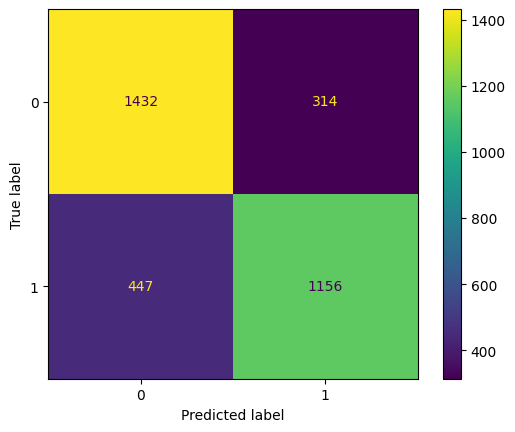

In [ ]:
myMatrix = ConfusionMatrixDisplay(confusion_matrix(test_y, predic), display_labels = mylr.classes_)
myMatrix.plot()

In [ ]:
tp, fn, fp, tn = confusion_matrix(test_y, predic).ravel()
tp, fn, fp, tn

(1432, 314, 447, 1156)

In [ ]:
# Precision - The ratio of correctly predicted 'Subscribed' observations to the total predicted 'Subscribed' observations
precision = precision_score(test_y, predic)

In [ ]:
# Precision is
precision

0.7863945578231293

In [ ]:
# recall : The ratio of correctly predicted 'Subscribed' observations to the total actual 'Subscribed' observations.
recall = recall_score(test_y, predic)
recall

0.7211478477854024

In [ ]:
# f1_score : The harmonic mean of precision and recall.
f1Score = f1_score(test_y, predic)
f1Score

0.7523592580540189

In [ ]:
 # Specificity : The ratio of correctly predicted 'Not Subscribed' observations to the total actual 'Not Subscribed' observations.
 specificity = specificity = tn / (tn + fp)
 specificity


0.7211478477854024